# Volume Indicator Formulas


## 1. On-Balance Volume (OBV)

**Formula:**

OBVₜ = OBVₜ₋₁ +
+Vₜ if Pₜ > Pₜ₋₁
-Vₜ if Pₜ < Pₜ₋₁
0 if Pₜ = Pₜ₋₁


**Explanation:**  
Measures buying/selling pressure. OBV increases when the price rises and decreases when it falls. Useful for identifying whether volume supports price movements.

<br>

## 2. Price Volume Trend (PVT)

**Formula:**

PVTₜ = PVTₜ₋₁ + [(Pₜ - Pₜ₋₁) / Pₜ₋₁] × Vₜ


**Where:**
- `PVTₜ` = Current Price Volume Trend value  
- `PVTₜ₋₁` = Previous PVT value  
- `Pₜ` = Closing price at time `t`  
- `Pₜ₋₁` = Closing price at time `t-1`  
- `Vₜ` = Volume at time `t`

**Explanation:**
- PVT is a cumulative volume-based indicator that factors in percentage price change.
- It helps identify the direction of price movements confirmed by volume.

<br>

## 3. Volume Relative Strength Index (Volume RSI)

**Formula:**

Volume RSIₜ = 100 × [V_avg_up / (V_avg_up + V_avg_down)]


**Where:**
- `V_avg_up` = Average volume on days when volume increased (commonly over 14 periods)  
- `V_avg_down` = Average volume on days when volume decreased  

**Calculation Steps:**
1. For each time step `t`:
   - If `Vₜ > Vₜ₋₁`: record the gain (`Vₜ - Vₜ₋₁`)
   - If `Vₜ < Vₜ₋₁`: record the loss (`Vₜ₋₁ - Vₜ`)
2. Compute the moving average of gains and losses (SMA or EMA)
3. Plug into the RSI formula

**Explanation:**
- Volume RSI works like standard RSI but tracks momentum in **volume** rather than price.
- High Volume RSI → increasing volume (buying pressure), low Volume RSI → decreasing volume (selling pressure).

<br>

## 4. Accumulation/Distribution Line (A/D Line)

**Formulas:**

CLVₜ = ((Pₜ - Lₜ) - (Hₜ - Pₜ)) / (Hₜ - Lₜ)
A/Dₜ = A/Dₜ₋₁ + (CLVₜ × Vₜ)


**Explanation:**  
Shows whether a stock is being accumulated or distributed by comparing the close relative to the high-low range. High CLV implies accumulation; low implies distribution.

<br>

## 5. Volume Weighted Average Price (VWAP)

**Formula:**

VWAPₜ = Σ(Pᵢ × Vᵢ) / ΣVᵢ


**Explanation:**  
VWAP gives the average trading price of a stock weighted by volume. It's widely used by institutional investors to assess execution quality.

<br>

## 6. Negative Volume Index (NVI)

**Formula:**

NVIₜ = NVIₜ₋₁ + [(Pₜ - Pₜ₋₁) / Pₜ₋₁] × NVIₜ₋₁ if Vₜ < Vₜ₋₁


**Explanation:**  
NVI updates only on days when volume decreases. It's based on the idea that smart money trades on quiet days.

<br>

## 7. Positive Volume Index (PVI)

**Formula:**

PVIₜ = PVIₜ₋₁ + [(Pₜ - Pₜ₋₁) / Pₜ₋₁] × PVIₜ₋₁ if Vₜ > Vₜ₋₁


**Explanation:**  
PVI updates on high-volume days, assuming those days reflect retail trader behavior. It's a momentum-based indicator.





## Examples using On-Balance Volume(OBV)

In [1]:
# Simulate data for Price, Volume, and OBV
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=100)
price = np.cumsum(np.random.normal(0, 1, 100)) + 100
volume = np.random.randint(100, 1000, size=100)

# Calculate On-Balance Volume (OBV)
obv = [0]
for i in range(1, len(price)):
    if price[i] > price[i-1]:
        obv.append(obv[-1] + volume[i])
    elif price[i] < price[i-1]:
        obv.append(obv[-1] - volume[i])
    else:
        obv.append(obv[-1])

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Price': price, 'Volume': volume, 'OBV': obv})
df.set_index('Date', inplace=True)
df.head()


,Price,Volume,OBV
Date,,,
2023-01-01,100.496714,748,0
2023-01-02,100.358450,417,-417
2023-01-03,101.006138,776,359
2023-01-04,102.529168,324,683
2023-01-05,102.295015,918,-235


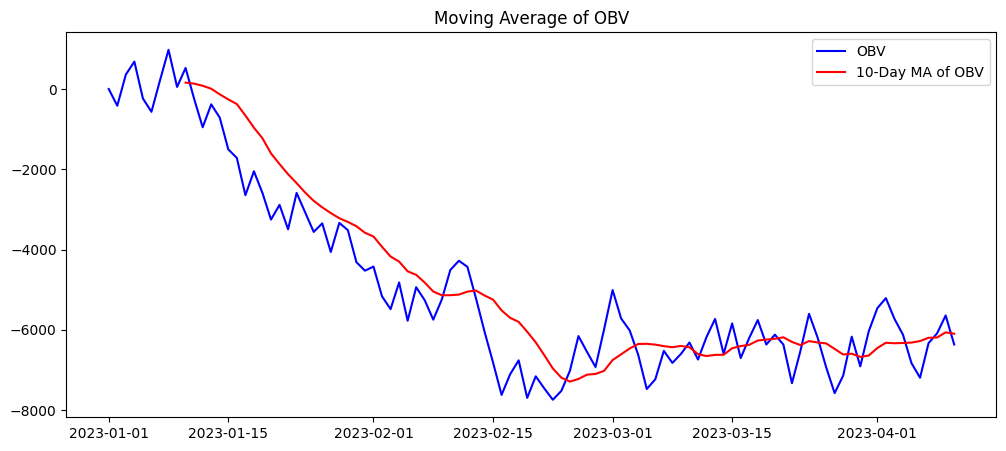

In [2]:
# 📈 Moving Average of OBV
# Formula:
# MA_t = (1/n) * ∑ OBV_i

df['OBV_MA_10'] = df['OBV'].rolling(window=10).mean()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(df['OBV'], label='OBV', color='blue')
plt.plot(df['OBV_MA_10'], label='10-Day MA of OBV', color='red')
plt.title('Moving Average of OBV')
plt.legend()
plt.show()


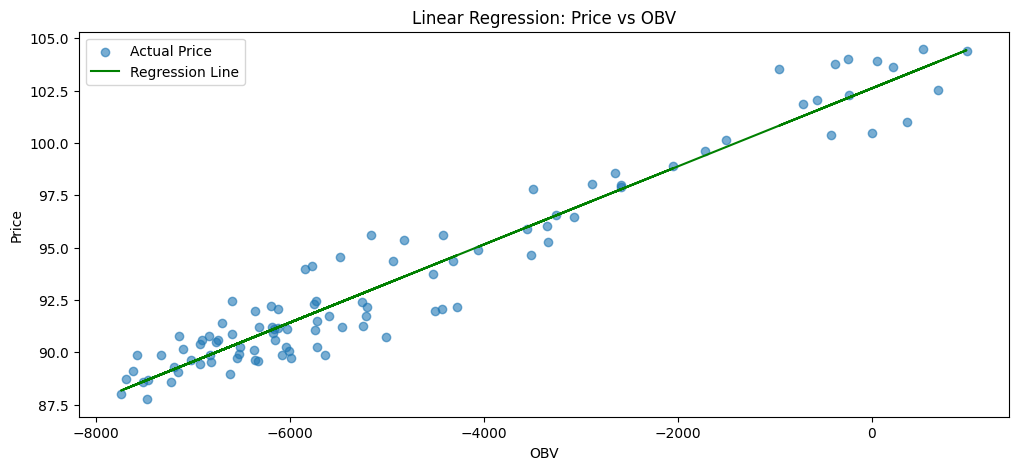

In [3]:
# 📊 Linear Regression: Price vs OBV
# Formula: ŷ = β₀ + β₁ * OBV

from sklearn.linear_model import LinearRegression

X = df[['OBV']]
y = df['Price']
model = LinearRegression().fit(X, y)
df['Price_Predicted'] = model.predict(X)

plt.figure(figsize=(12, 5))
plt.scatter(df['OBV'], df['Price'], alpha=0.6, label='Actual Price')
plt.plot(df['OBV'], df['Price_Predicted'], color='green', label='Regression Line')
plt.xlabel('OBV')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs OBV')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


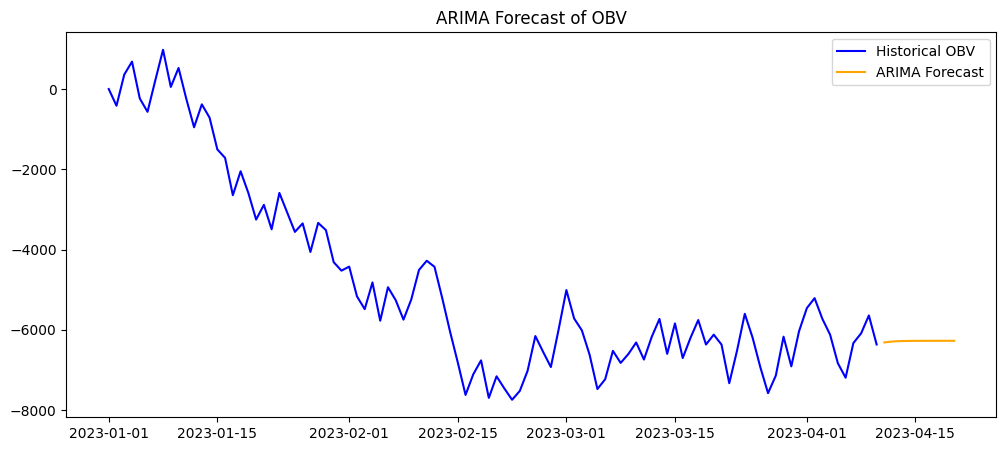

In [4]:
# 🔮 ARIMA Forecasting on OBV
# ARIMA(p,d,q) = ARIMA(1,1,1) used here
# OBV_t = α + φ₁OBV_{t-1} + θ₁ε_{t-1} + ε_t

from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(df['OBV'], order=(1, 1, 1))
model_fit = model_arima.fit()
forecast = model_fit.forecast(steps=10)

future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=10)
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['OBV'], label='Historical OBV', color='blue')
plt.plot(future_dates, forecast, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast of OBV')
plt.legend()
plt.show()


## Examples using Price Volume Trend (PVT) and Volume RSI in Python

## Install Required Libraries

```python
!pip install pandas yfinance matplotlib ta


In [5]:
import pandas as pd
import yfinance as yf

# Load historical data for a stock, e.g., Apple
data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')
data = data[['Close', 'Volume']]
data.head()


/tmp/ipython-input-5-2203118730.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,Volume
Ticker,AAPL,AAPL
Date,,
2022-01-03,178.645630,104487900
2022-01-04,176.378326,99310400
2022-01-05,171.686707,94537600
2022-01-06,168.820663,96904000
2022-01-07,168.987534,86709100


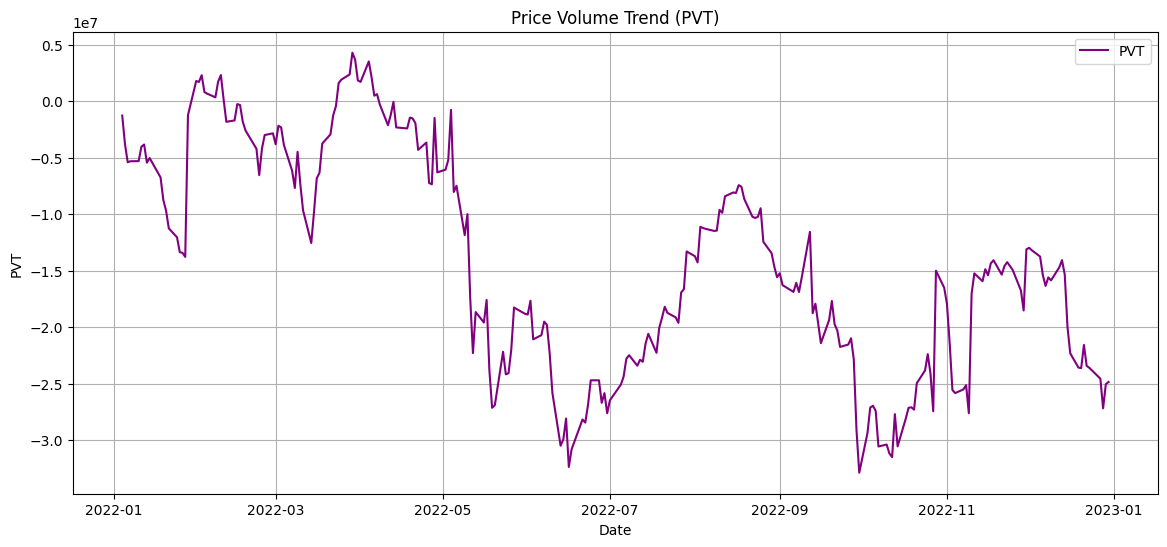

In [6]:
# Calculate PVT
data['PVT'] = ((data['Close'].pct_change()) * data['Volume']).cumsum()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.title("Price Volume Trend (PVT)")
plt.plot(data['PVT'], label='PVT', color='purple')
plt.xlabel("Date")
plt.ylabel("PVT")
plt.legend()
plt.grid(True)
plt.show()




### What It Shows:
The **PVT plot** displays the cumulative effect of volume-weighted price changes over time.

- When the line is **rising**, it indicates **buying pressure** — i.e., prices are rising on increasing volume.
- When the line is **falling**, it indicates **selling pressure** — i.e., prices are falling on high volume.
- A **flat or stagnant** PVT suggests consolidation or low conviction in the market trend.

### Use Cases:
- **Trend Confirmation**: If price is going up and PVT is also rising, the uptrend is likely supported by strong volume.
- **Divergence Signal**: If price is rising but PVT is flat or falling, it may signal a weakening trend or potential reversal.





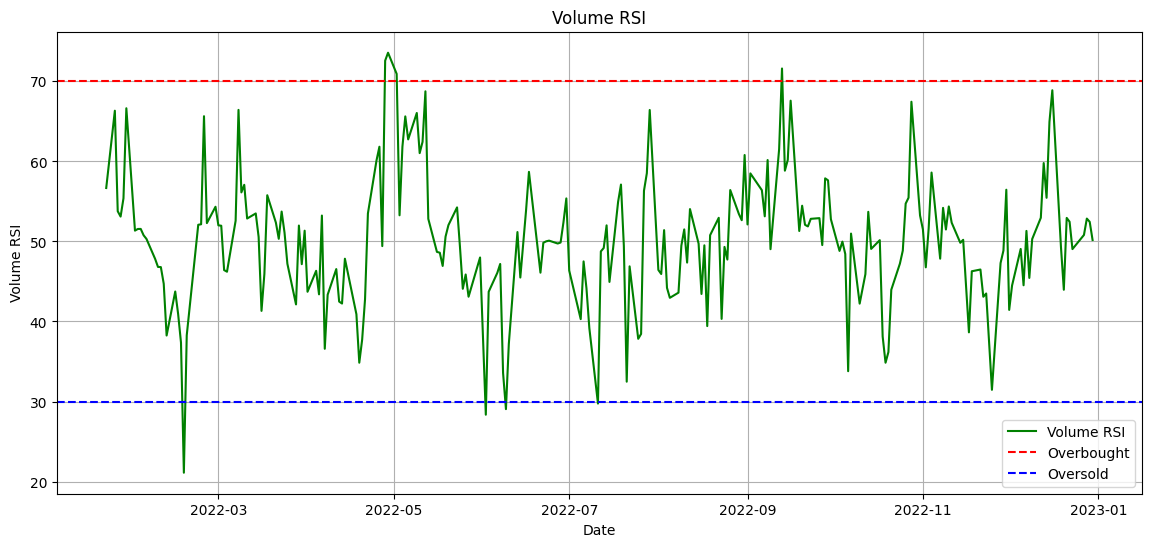

In [7]:
# Calculate volume RSI
def volume_rsi(volume, period=14):
    vol_diff = volume.diff()
    vol_up = vol_diff.where(vol_diff > 0, 0.0)
    vol_down = -vol_diff.where(vol_diff < 0, 0.0)

    avg_gain = vol_up.rolling(window=period).mean()
    avg_loss = vol_down.rolling(window=period).mean()

    rsi = 100 * avg_gain / (avg_gain + avg_loss)
    return rsi

# Apply to volume column
data['Volume_RSI'] = volume_rsi(data['Volume'], period=14)

# Plot
plt.figure(figsize=(14, 6))
plt.title("Volume RSI")
plt.plot(data['Volume_RSI'], label='Volume RSI', color='green')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='blue', linestyle='--', label='Oversold')
plt.xlabel("Date")
plt.ylabel("Volume RSI")
plt.legend()
plt.grid(True)
plt.show()


## Volume RSI Plot

### What It Shows:
The **Volume RSI** plot measures the **momentum of volume** rather than price.

- The RSI scale ranges from **0 to 100**.
- A reading **above 70** suggests **overbought volume conditions** — excessive buying activity.
- A reading **below 30** suggests **oversold volume conditions** — excessive selling activity.
- Values between **30 and 70** represent a neutral zone with balanced volume momentum.


